# Example 4.2: Two layer FFN

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set the features of the network and for learning

In [2]:
num_features = 2
num_labels = 2
num_hidden = 3

num_data = 8

lr = 0.05
num_epochs = 1000

## Generate training data

In [3]:
SEED = 10
np.random.seed(SEED)

# generate training data
X = np.random.rand(num_data, num_features)
Y = 2*np.random.rand(num_data, num_labels) - 1

print('x:{}'.format(X))
print('y:{}'.format(Y))

x:[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]]
y:[[ 0.44351063 -0.41624786]
 [ 0.83554825  0.42915157]
 [ 0.08508874 -0.7156599 ]
 [-0.25331848  0.34826723]
 [-0.11633365 -0.13197201]
 [ 0.23553396  0.02627649]
 [ 0.30079436  0.20207791]
 [ 0.61044639  0.0432943 ]]


## initialization routines for bias and weights

In [4]:
def init_bias(n = 1):
    return(tf.Variable(np.zeros(n), dtype=tf.float64))

def init_weights(n_in=1, n_out=1, logistic=True):
    W_values = np.asarray(np.random.uniform(low=-np.sqrt(6. / (n_in + n_out)),
                                            high=np.sqrt(6. / (n_in + n_out)),
                                            size=(n_in, n_out)))
    if logistic == True:
        W_values *= 4
    return(tf.Variable(W_values, dtype=tf.float64))

## Define class for the network

In [5]:
class Two_Layer_FFN():
  def __init__(self, num_features, num_hidden, num_labels):
    self.V = init_weights(num_hidden, num_labels)
    self.c = init_bias(num_labels)
    self.W = init_weights(num_features, num_hidden)
    self.b = init_bias(num_hidden)

  def __call__(self, x):
    z = tf.matmul(x, self.W) + self.b
    h = tf.nn.sigmoid(z)
    y = tf.matmul(h, self.V) + self.c
    return z, h, y

In [6]:
def loss(targets, outputs):
    return tf.reduce_mean(tf.reduce_sum(tf.square(targets - outputs),axis=1))

In [7]:
def train(model, inputs, targets, learning_rate):
    z, h, y = model(inputs)
    grad_u = -(targets - y)
    grad_V = tf.matmul(tf.transpose(h), grad_u)
    grad_c = tf.reduce_sum(grad_u, axis=0)

    dh = h*(1-h)
    grad_z = tf.matmul(grad_u, tf.transpose(model.V))*dh
    grad_W = tf.matmul(tf.transpose(inputs), grad_z)
    grad_b = tf.reduce_sum(grad_z, axis=0)

    model.W.assign_sub(learning_rate*grad_W)
    model.b.assign_sub(learning_rate*grad_b)
    model.V.assign_sub(learning_rate*grad_V)
    model.c.assign_sub(learning_rate*grad_c)
    
    return grad_u, dh, grad_z, grad_V, grad_c, grad_W, grad_b
  

In [8]:
model = Two_Layer_FFN(num_features, num_hidden, num_labels)

print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

W = [[-3.97080171  1.10672512  0.41702418]
 [ 2.79809104 -2.63829158  3.12727936]], b = [0. 0. 0.]
V = [[ 3.58121936 -1.58413555]
 [-3.58903444 -1.7465772 ]
 [-3.38287156  2.88041883]], c = [0. 0.]


## Train the network

In [9]:
err = []
for epoch in range(num_epochs):

    z_, h_, y_ = model(X)
    cost_ = loss(Y, y_)
    grad_u_, dh_, grad_z_, grad_V_, grad_c_, grad_W_, grad_b_ = train(model, X, Y, lr)
    
    if epoch == 0:
        print('iter: {}'.format(epoch+1))
        print('z: {}'.format(z_))
        print('h: {}'.format(h_))
        print('y: {}'.format(y_))
        print('grad_u: {}'.format(grad_u_))
        print('dh: {}'.format(dh_))
        print('grad_z:{}'.format(grad_z_))
        print('grad_V:{}'.format(grad_V_))
        print('grad_c:{}'.format(grad_c_))
        print('grad_W:{}'.format(grad_W_))
        print('grad_b:{}'.format(grad_b_))
        print('cost: {}'.format(cost_))
        print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
        print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))
        
    err.append(cost_)
    if not epoch%100:
        print('epoch: {}, m.s.e: {}'.format(epoch,err[epoch]))

iter: 1
z: [[-3.00469548  0.79889024  0.3865565 ]
 [-0.42087006 -1.27428856  2.60596556]
 [-1.35047102 -0.04136886  0.91089139]
 [ 1.34156581 -1.78730062  2.46098901]
 [-0.42432276 -0.04590698  0.34678659]
 [-0.05374656 -1.75682471  3.26733895]
 [ 1.4174828  -1.34694289  1.60341482]
 [-1.512853   -0.71667433  2.25442272]]
h: [[0.0472142  0.68973704 0.59545347]
 [0.39630857 0.21852401 0.93124453]
 [0.20579338 0.48965926 0.71318253]
 [0.79274732 0.14340399 0.92136135]
 [0.39548282 0.48852527 0.58583812]
 [0.48656659 0.14718847 0.96329119]
 [0.8049435  0.20637062 0.83249511]
 [0.18051636 0.32812574 0.90503135]]
y: [[-4.32074822  0.43568272]
 [-2.51530288  1.67289873]
 [-3.43301763  0.8730321 ]
 [-0.79252693  1.14762123]
 [-2.31883841  0.20771366]
 [-2.04445315  1.74681862]
 [-0.67421608  0.76235277]
 [-3.59279069  1.74781001]]
grad_u: [[-4.76425886  0.85193058]
 [-3.35085113  1.24374716]
 [-3.51810636  1.588692  ]
 [-0.53920845  0.799354  ]
 [-2.20250476  0.33968567]
 [-2.27998711  1.7205

In [10]:
print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

_, _, y_ = model(X)
mse = loss(Y, y_)
print('m.s.e: {}'.format(mse))

W = [[-2.04060452 -0.5157363  -1.8765965 ]
 [ 3.5527165  -2.59521722  2.415937  ]], b = [ 0.21522817 -0.93143254  0.15014535]
V = [[ 2.1388451  -1.13506266]
 [-2.92533251 -1.78251379]
 [-3.59438375  2.28171372]], c = [ 1.25162402 -0.42972376]
m.s.e: 0.10737983651398145


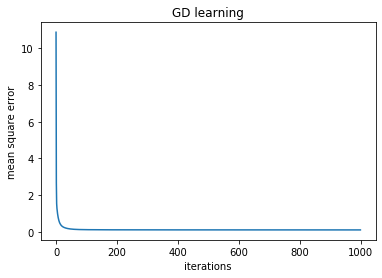

In [11]:
# plot learning curves
plt.figure(1)
plt.plot(range(num_epochs), err)
plt.xlabel('iterations')
plt.ylabel('mean square error')
plt.title('GD learning')
plt.savefig('figures/4.2_1.png')

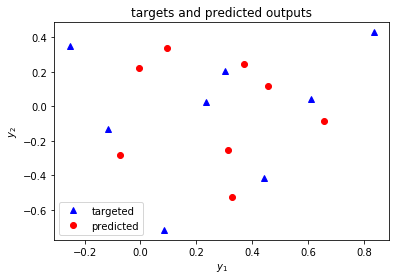

In [12]:
# plot trained and predicted points
_, _, y_ = model(X)
    
plt.figure(2)
plot_targets = plt.plot(Y[:,0], Y[:,1], 'b^', label='targeted')
plot_pred = plt.plot(y_[:,0], y_[:,1], 'ro', label='predicted')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('targets and predicted outputs')
plt.legend()
plt.savefig('./figures/4.2_2.png')